In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.coordinates as coord
from astropy.table import Table, vstack
from astropy.io import fits
import astropy.units as u

import gala.coordinates as gc

import pickle

coord.galactocentric_frame_defaults.set('v4.0')

In [2]:
plt.style.use('notebook')

## Define coordinate system

In [3]:
tc = Table.read('../data/stream_endpoints_5d.fits')

In [4]:
tc

name,ra [2],dec [2],dec_err [2],d [2],d_err [2],pmra [2],pmdec [2],pm_err [2]
,deg,deg,deg,kpc,kpc,mas / yr,mas / yr,mas / yr
bytes11,float64,float64,float64,float64,float64,float64,float64,float64
ATLAS,9.3 .. 30.7,-20.9 .. -33.2,0.24 .. 0.24,22.9 .. 22.9,4.58 .. 4.58,-0.1 .. -0.1,-1.0 .. -1.0,1.0 .. 1.0
Aliqa Uma,31.7 .. 40.6,-31.5 .. -38.3,0.26 .. 0.26,28.8 .. 28.8,5.76 .. 5.76,0.3 .. 0.3,-0.6 .. -0.6,1.0 .. 1.0
Chenab,-40.7 .. -28.3,-59.9 .. -43.0,0.71 .. 0.71,39.8 .. 39.8,7.96 .. 7.96,0.3 .. 0.3,-2.4 .. -2.4,1.0 .. 1.0
Elqui,10.7 .. 20.6,-36.9 .. -42.4,0.54 .. 0.54,50.1 .. 50.1,10.02 .. 10.02,0.1 .. 0.1,-0.4 .. -0.4,1.0 .. 1.0
Fimbulthul,198.74 .. 214.23,-29.56 .. -22.76,0.5 .. 0.5,4.22 .. 4.22,0.01 .. 0.01,-8.2 .. -18.9,-8.1 .. -12.8,1.0 .. 1.0
"Fj\""{o}rm",197.37 .. 250.88,5.55 .. 64.2,0.5 .. 0.5,4.9 .. 4.9,0.07 .. 0.07,-2.5 .. 2.2,4.0 .. 5.2,1.0 .. 1.0
"Gj\""{o}ll",70.16 .. 90.05,-2.46 .. -20.15,0.5 .. 0.5,3.38 .. 3.38,0.1 .. 0.1,21.7 .. 24.1,-22.1 .. -22.4,1.0 .. 1.0
Indus,-36.3 .. -8.0,-50.7 .. -64.8,0.83 .. 0.83,16.6 .. 16.6,3.32 .. 3.32,3.5 .. 3.5,-5.4 .. -5.4,1.0 .. 1.0


In [225]:
ind = tc['name']=='Phoenix'
tp = tc[ind]
tp

name,ra [2],dec [2],dec_err [2],d [2],d_err [2],pmra [2],pmdec [2],pm_err [2]
,deg,deg,deg,kpc,kpc,mas / yr,mas / yr,mas / yr
bytes11,float64,float64,float64,float64,float64,float64,float64,float64
Phoenix,20.1 .. 27.9,-55.3 .. -42.7,0.16 .. 0.16,19.1 .. 19.1,3.82 .. 3.82,2.8 .. 2.8,-0.1 .. -0.1,1.0 .. 1.0


In [238]:
cp_phoenix = coord.SkyCoord(ra=tp['ra'], dec=tp['dec'], distance=tp['d'], frame='icrs')[0]

In [239]:
pole_phoenix = gc.pole_from_endpoints(cp_phoenix[0], cp_phoenix[1])

In [242]:
fr_phoenix = gc.GreatCircleICRSFrame(pole=pole_phoenix, rotation=35.5*u.deg)
cpole_phoenix = cp.transform_to(fr_phoenix)
np.min(cpole_phoenix.phi1), np.max(cpole_phoenix.phi1)

(<Angle -7.16748351 deg>, <Angle 7.04425423 deg>)

In [5]:
ind = tc['name']=='Turbio'
t_ = tc[ind]

In [6]:
t_

name,ra [2],dec [2],dec_err [2],d [2],d_err [2],pmra [2],pmdec [2],pm_err [2]
,deg,deg,deg,kpc,kpc,mas / yr,mas / yr,mas / yr
bytes11,float64,float64,float64,float64,float64,float64,float64,float64
Turbio,28.0 .. 27.9,-61.0 .. -46.0,0.25 .. 0.25,16.6 .. 16.6,3.32 .. 3.32,2.3 .. 2.3,2.0 .. 2.0,1.0 .. 1.0


In [10]:
cp = coord.SkyCoord(ra=t_['ra'], dec=t_['dec'], distance=t_['d'], frame='icrs')[0]

In [11]:
cp.ra, cp.dec

(<Longitude [28. , 27.9] deg>, <Latitude [-61., -46.] deg>)

In [12]:
pole = gc.pole_from_endpoints(cp[0], cp[1])

In [22]:
fr = gc.GreatCircleICRSFrame(pole=pole, rotation=36.5*u.deg)
cpole = cp.transform_to(fr)
np.min(cpole.phi1), np.max(cpole.phi1)

(<Angle -7.50026655 deg>, <Angle 7.499847 deg>)

## Create $Gaia$ query

In [231]:
corners = np.array([[-15, -10], [-15,10], [15,10], [15,-10]])

In [232]:
c_corner = coord.SkyCoord(phi1=corners[:,0]*u.deg, phi2=corners[:,1]*u.deg, frame=fr)
ceq_corner = c_corner.transform_to(coord.ICRS)

In [233]:
q_base ='''SELECT * FROM gaiaedr3.gaia_source
WHERE parallax < 1 AND
      CONTAINS(POINT('ICRS', ra, dec), 
               POLYGON('ICRS', 
                       {0.ra.degree}, {0.dec.degree}, 
                       {1.ra.degree}, {1.dec.degree}, 
                       {2.ra.degree}, {2.dec.degree}, 
                       {3.ra.degree}, {3.dec.degree})) = 1
'''

In [234]:
print(q_base.format(ceq_corner[3], ceq_corner[2], ceq_corner[1], ceq_corner[0]))

SELECT * FROM gaiaedr3.gaia_source
WHERE parallax < 1 AND
      CONTAINS(POINT('ICRS', ra, dec), 
               POLYGON('ICRS', 
                       40.56080497402664, -37.78218217158842, 
                       15.16671146984597, -37.839381929312474, 
                       2.341539223025948, -66.44464861411443, 
                       53.725452811842004, -66.33182491859777)) = 1



In [293]:
tgc = Table.read('../data/baumgardt_positions.fits')

c_gc_eq = coord.SkyCoord(ra=tgc['RAJ2000'], dec=tgc['DEJ2000'], distance=tgc['Rsun'],
                      pm_ra_cosdec=tgc['pmRA_'], pm_dec=tgc['pmDE'], radial_velocity=tgc['RV'], frame='icrs')
c_gc = c_gc_eq.transform_to(fr)

In [294]:
ind_gc = tgc['Name']=='NGC 6101'

In [288]:
cpole_eq_nc = coord.SkyCoord(ra=t_['ra'], dec=t_['dec'], distance=t_['d'], pm_ra_cosdec=t_['pmra'][::-1],
                    pm_dec=t_['pmdec'][::-1], radial_velocity=np.ones(len(t_))*u.km/u.s, frame='icrs')[0]
cpole_nc = cpole_eq_nc.transform_to(fr)

cpole_eq = gc.reflex_correct(cpole_eq_nc)
cpole = cpole_eq.transform_to(fr)

## Analyze Gaia data

In [373]:
t = Table(fits.getdata('../data/gaia/turbio_phoenix.fits.gz'))

In [374]:
tabb = t[::]

In [375]:
ceq_nc = coord.SkyCoord(ra=tabb['ra']*u.deg, dec=tabb['dec']*u.deg, distance=np.ones(len(tabb))*t_['d'][:,0]*u.kpc,
                  pm_ra_cosdec=tabb['pmra']*u.mas/u.yr, pm_dec=tabb['pmdec']*u.mas/u.yr,
                  radial_velocity=np.zeros(len(tabb))*u.km/u.s, frame='icrs')
ceq = gc.reflex_correct(ceq_nc)
c_gal = ceq.transform_to(coord.Galactic)

c = ceq.transform_to(fr)

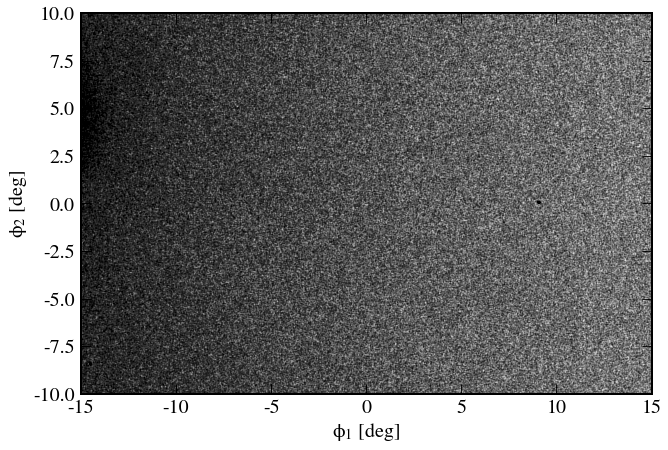

In [376]:
plt.figure(figsize=(15,7))
plt.plot(c.phi1, c.phi2, 'k.', ms=1, alpha=0.1)
# plt.plot(c_gc.phi1, c_gc.phi2, 'ro')

plt.xlabel('$\phi_1$ [deg]')
plt.ylabel('$\phi_2$ [deg]')
plt.xlim(-15,15)
plt.ylim(-10,10)
plt.gca().set_aspect('equal')

In [377]:
ind_phi2 = (np.abs(c.phi2)<2*u.deg) & (c.phi1<8*u.deg)
ind_off = (np.abs(c.phi2)<5*u.deg) & (np.abs(c.phi2)>3*u.deg) & (c.phi1<8*u.deg)
ind_pmeq = (t['pmra']>1.7) & (t['pmra']<2.7) & (t['pmdec']>1.2) & (t['pmdec']<2.2)

In [378]:
points = np.array([tabb['bp_rp'], tabb['phot_g_mean_mag']]).T

In [379]:
iso_full = Table.read('/home/ana/data/isochrones/gaia/mist_13.0_-2.00.cmd',
                 format='ascii.commented_header', header_start=12)
phasecut = (iso_full['phase']>=0) & (iso_full['phase']<4)
iso = iso_full[phasecut]
i_bprp_ = iso['Gaia_BP_EDR3']-iso['Gaia_RP_EDR3'] + 0.07
i_g_ = iso['Gaia_G_EDR3']+dm

phasecut = (iso_full['phase']>=0) & (iso_full['phase']<3)
iso = iso_full[phasecut]

# distance modulus
distance_app = 16.6*u.kpc
dm = 5*np.log10((distance_app.to(u.pc)).value)-5

# main sequence + rgb
i_bprp = iso['Gaia_BP_EDR3']-iso['Gaia_RP_EDR3'] + 0.07
i_g = iso['Gaia_G_EDR3']+dm

In [380]:
i_left = i_bprp - 0.15*(i_g/28)**2
i_right = i_bprp + 0.2*(i_g/28)**2

poly = np.hstack([np.array([i_left, i_g]), np.array([i_right[::-1], i_g[::-1]])]).T
ind = (poly[:,1]<21) & (poly[:,1]>12)
poly_main = poly[ind]

path_main = mpl.path.Path(poly_main)
ind_cmd = path_main.contains_points(points)

In [381]:
g_min = 16.4
g_max = 17
bprp_min = 0.1
bprp_max = 0.5
poly_bhb = np.array([[bprp_min, g_max], [bprp_min, g_min], [bprp_max, g_min], [bprp_max, g_max]])
path_bhb = mpl.path.Path(poly_bhb)
ind_bhb = path_bhb.contains_points(points)

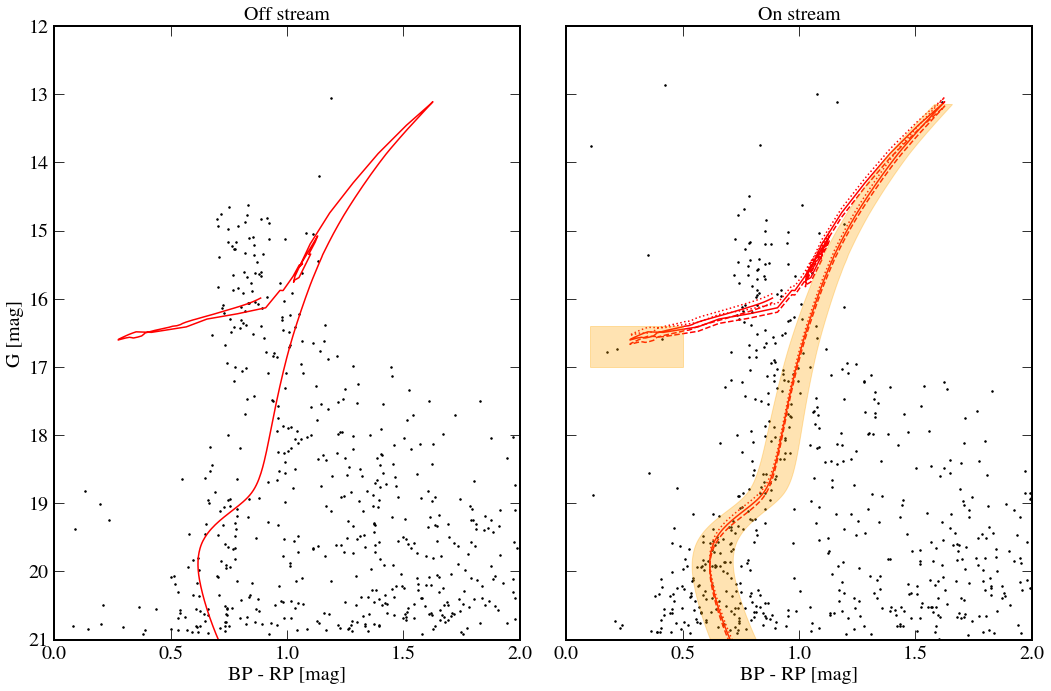

In [401]:
fig, ax = plt.subplots(1,2,figsize=(15,10), sharex=True, sharey=True)

plt.sca(ax[0])
plt.plot(tabb['bp_rp'][ind_off & ind_pmeq], tabb['phot_g_mean_mag'][ind_off & ind_pmeq], 'k.', ms=3, alpha=1)
plt.plot(i_bprp_, i_g_, 'r-')

plt.xlabel('BP - RP [mag]')
plt.ylabel('G [mag]')
plt.title('Off stream', fontsize='medium')
plt.xlim(0,2)
plt.ylim(21,12)

plt.sca(ax[1])
plt.plot(tabb['bp_rp'][ind_phi2 & ind_pmeq], tabb['phot_g_mean_mag'][ind_phi2 & ind_pmeq], 'k.', ms=3, alpha=1)
plt.plot(i_bprp_, i_g_, 'r-')

# distance uncertainty
delta_distance = 0.5*u.kpc
dm_plus = 5*np.log10(((distance_app+delta_distance).to(u.pc)).value) - 5*np.log10((distance_app.to(u.pc)).value)
dm_minus = 5*np.log10((distance_app.to(u.pc)).value) - 5*np.log10(((distance_app-delta_distance).to(u.pc)).value)
plt.plot(i_bprp_, i_g_+dm_plus, 'r--')
plt.plot(i_bprp_, i_g_-dm_minus, 'r:')


pm = mpl.patches.Polygon(poly_main, color='orange', alpha=0.3, zorder=2, label='')
plt.gca().add_artist(pm)

pm = mpl.patches.Polygon(poly_bhb, color='orange', alpha=0.3, zorder=2, label='')
plt.gca().add_artist(pm)

plt.xlabel('BP - RP [mag]')
plt.title('On stream', fontsize='medium')

plt.tight_layout()

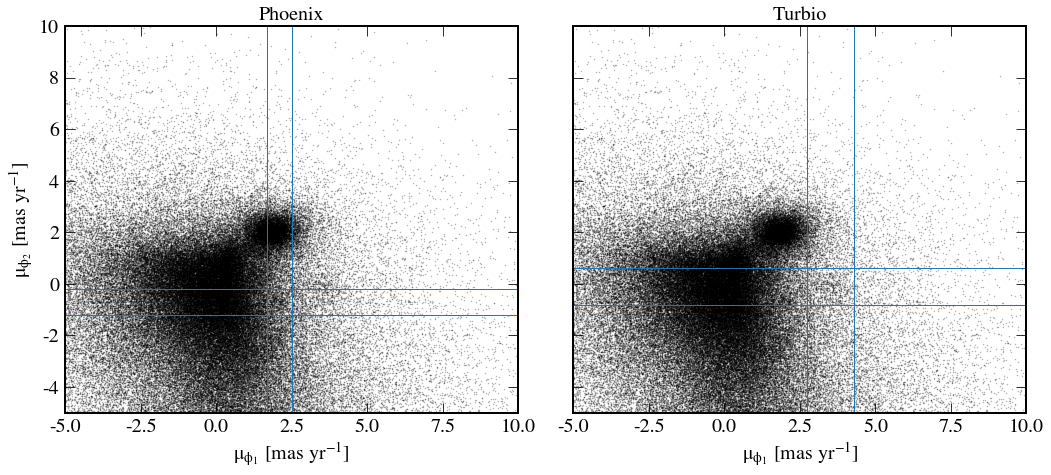

In [428]:
fig, ax = plt.subplots(1,2,figsize=(15,7), sharex=True, sharey=True)

plt.sca(ax[0])
plt.plot(c.pm_phi1_cosphi2[ind_bhb | ind_cmd], c.pm_phi2[ind_bhb | ind_cmd], 'k.', ms=1, alpha=0.3)
# plt.plot(c.pm_phi1_cosphi2[ind_off & ind_pmeq], c.pm_phi2[ind_off & ind_pmeq], 'r.', ms=1, alpha=0.1)

plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('$\mu_{\phi_1}$ [mas yr$^{-1}$]')
plt.ylabel('$\mu_{\phi_2}$ [mas yr$^{-1}$]')
plt.title('Phoenix', fontsize='medium')

lw=1
plt.axvline(1.7, lw=lw)
plt.axvline(2.5, lw=lw)
plt.axhline(-0.2, lw=lw)
plt.axhline(-1.2, lw=lw)

plt.sca(ax[1])
plt.plot(c.pm_phi1_cosphi2[ind_bhb | ind_cmd], c.pm_phi2[ind_bhb | ind_cmd], 'k.', ms=1, alpha=0.3)
# plt.plot(c.pm_phi1_cosphi2[ind_bhb], c.pm_phi2[ind_bhb], 'ro', ms=2)

plt.axvline(2.75, lw=lw)
plt.axvline(4.3, lw=lw)
plt.axhline(-0.8, lw=lw)
plt.axhline(0.6, lw=lw)

plt.xlabel('$\mu_{\phi_1}$ [mas yr$^{-1}$]')
plt.title('Turbio', fontsize='medium')

plt.tight_layout()
plt.savefig('../plots/turbio_phoenix_pm.png')

In [385]:
ind_pm = ((c.pm_phi1_cosphi2>2.75*u.mas/u.yr) & (c.pm_phi1_cosphi2<4.3*u.mas/u.yr) & (c.pm_phi2>-0.8*u.mas/u.yr)
          & (c.pm_phi2<0.6*u.mas/u.yr))
ind_pm_phoenix = ((c.pm_phi1_cosphi2>1.7*u.mas/u.yr) & (c.pm_phi1_cosphi2<2.5*u.mas/u.yr) & 
                  (c.pm_phi2>-1.2*u.mas/u.yr) & (c.pm_phi2<-0.2*u.mas/u.yr))

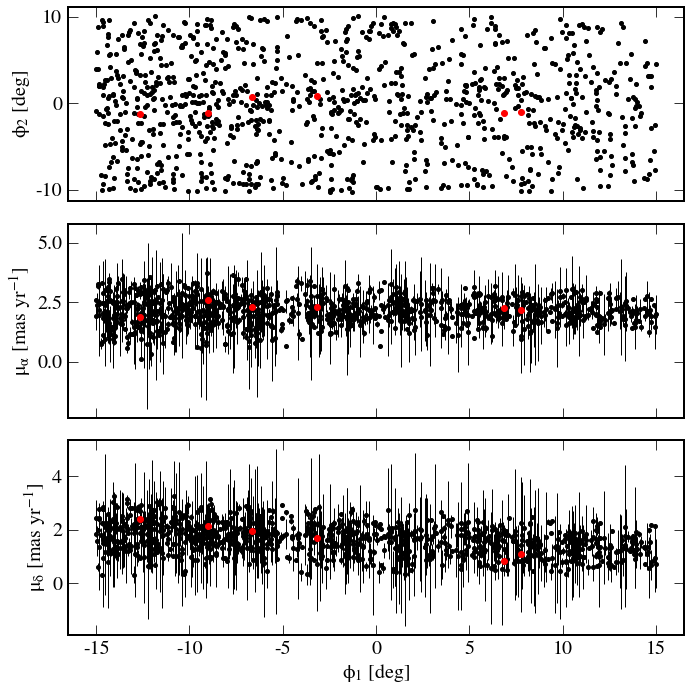

In [429]:
y = [c.phi2.value, t['pmra'], t['pmdec']]
yerr = [(t['dec_error']*u.mas).to(u.deg).value, t['pmra_error'], t['pmdec_error']]
nr = len(y)

ylabels = ['$\phi_2$ [deg]', '$\mu_{\\alpha}$ [mas yr$^{-1}$]', '$\mu_{\delta}$ [mas yr$^{-1}$]']

ind_mem = ind_pm & ind_cmd
ind_mem_bhb = ind_pm & ind_bhb & (np.abs(c.phi2)<2*u.deg)

fig, ax = plt.subplots(nr, 1, figsize=(10,10), sharex=True)

for i in range(nr):
    plt.sca(ax[i])
    plt.errorbar(c.phi1.value[ind_mem], y[i][ind_mem], yerr=yerr[i][ind_mem], fmt='o', ms=4, color='k', lw=1)
    plt.errorbar(c.phi1.value[ind_mem_bhb], y[i][ind_mem_bhb], yerr=yerr[i][ind_mem_bhb], fmt='o', color='r')
    plt.ylabel(ylabels[i])

plt.xlabel('$\phi_1$ [deg]')
    
plt.tight_layout()
plt.savefig('../plots/turbio_track.png')

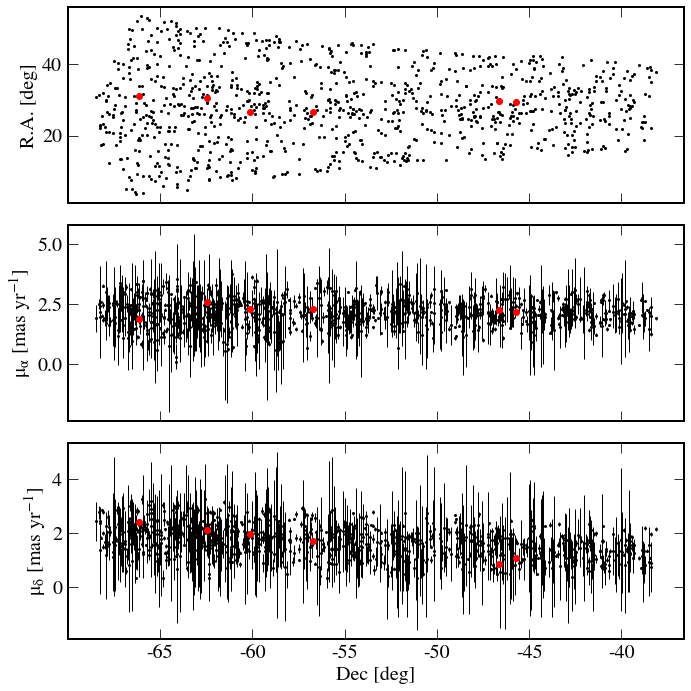

In [396]:
y = [t['ra'], t['pmra'], t['pmdec']]
yerr = [(t['dec_error']*u.mas).to(u.deg).value, t['pmra_error'], t['pmdec_error']]
nr = len(y)
ylabels = ['R.A. [deg]', '$\mu_{\\alpha}$ [mas yr$^{-1}$]', '$\mu_{\delta}$ [mas yr$^{-1}$]']

fig, ax = plt.subplots(nr, 1, figsize=(10,10), sharex=True)

for i in range(nr):
    plt.sca(ax[i])
    plt.errorbar(t['dec'][ind_mem], y[i][ind_mem], yerr=yerr[i][ind_mem], fmt='o', color='k', ms=2, lw=1)
    plt.errorbar(t['dec'][ind_mem_bhb], y[i][ind_mem_bhb], yerr=yerr[i][ind_mem_bhb], fmt='o', color='r')
    plt.ylabel(ylabels[i])

plt.xlabel('Dec [deg]')

plt.tight_layout()

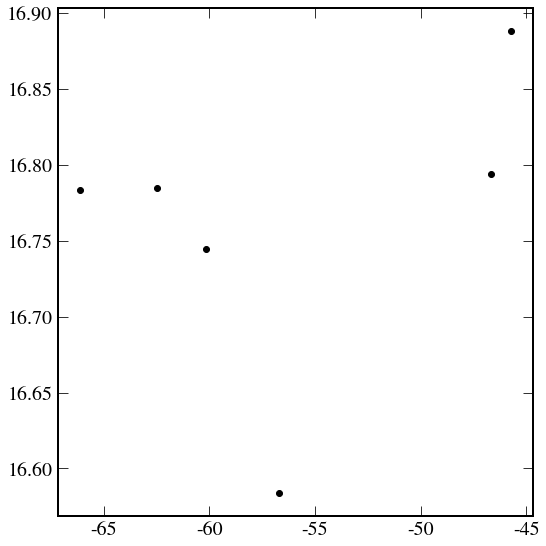

In [435]:
plt.plot(ceq_nc.dec[ind_mem_bhb], t['phot_g_mean_mag'][ind_mem_bhb], 'ko')
plt.tight_layout()

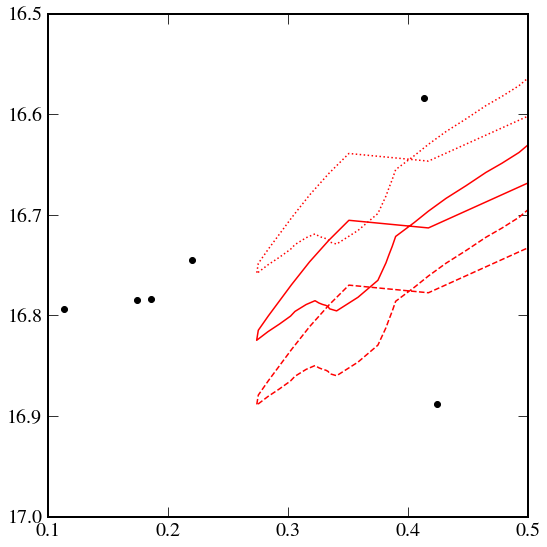

In [444]:
plt.plot(t['bp_rp'][ind_mem_bhb], t['phot_g_mean_mag'][ind_mem_bhb], 'ko')

g_off = 0.22
plt.plot(i_bprp_, i_g_+g_off, 'r-')
plt.plot(i_bprp_, i_g_+dm_plus+g_off, 'r--')
plt.plot(i_bprp_, i_g_-dm_minus+g_off, 'r:')

plt.xlim(0.1,0.5)
plt.ylim(17,16.5)

plt.tight_layout()

### Output BHBs for fitting

In [423]:
width = np.std(c.phi2[ind_mem_bhb])
phi1_min = np.min(c.phi1[ind_mem_bhb])
phi1_max = np.max(c.phi1[ind_mem_bhb])

Ncontrol = 20
phi1 = np.linspace(phi1_min, phi1_max, Ncontrol)
phi2 = np.zeros_like(phi1)
c_control = coord.SkyCoord(phi1=phi1, phi2=phi2, frame=fr)
cc_eq = c_control.transform_to(coord.ICRS)

In [424]:
data = dict()
# data['dec'] = [ceq_nc.ra[ind_mem_bhb], ceq_nc.dec[ind_mem_bhb], np.ones(np.sum(ind_mem_bhb))*width, 
#                ceq_nc.dec[ind_mem_bhb]]
data['dec'] = [cc_eq.ra, cc_eq.dec, np.ones(Ncontrol)*width, cc_eq.dec]
data['dist'] = [ceq_nc.ra[ind_mem_bhb], np.ones(np.sum(ind_mem_bhb))*distance_app, 
                np.ones(np.sum(ind_mem_bhb))*delta_distance, ceq_nc.dec[ind_mem_bhb]]
data['pmra'] = [ceq_nc.ra[ind_mem_bhb], ceq_nc.pm_ra_cosdec[ind_mem_bhb], 
                t['pmra_error'][ind_mem_bhb]*u.mas/u.yr, ceq_nc.dec[ind_mem_bhb]]
data['pmdec'] = [ceq_nc.ra[ind_mem_bhb], ceq_nc.pm_dec[ind_mem_bhb], 
                t['pmdec_error'][ind_mem_bhb]*u.mas/u.yr, ceq_nc.dec[ind_mem_bhb]]

In [425]:
pickle.dump(data, open('../data/streams/data_turbio.pkl', 'wb'))
pickle.dump(data, open('../../disrupted_gc/data/streams/data_turbio.pkl', 'wb'))

### Phoenix map

In [390]:
cphoenix = c.transform_to(fr_phoenix)

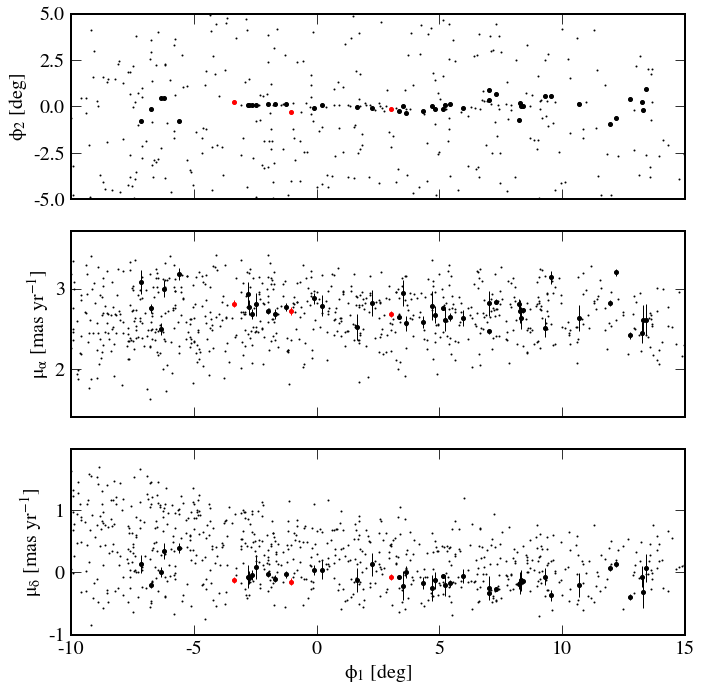

In [452]:
y = [cphoenix.phi2.value, t['pmra'], t['pmdec']]
yerr = [(t['dec_error']*u.mas).to(u.deg).value, t['pmra_error'], t['pmdec_error']]
nr = len(y)

ylabels = ['$\phi_2$ [deg]', '$\mu_{\\alpha}$ [mas yr$^{-1}$]', '$\mu_{\delta}$ [mas yr$^{-1}$]']

ind_phoenix = ind_pm_phoenix & ind_cmd
ind_phoenix_bhb = ind_pm_phoenix & ind_bhb
ind_phi2_phoenix = (np.abs(cphoenix.phi2.value)<1) & (t['pmra_error']<0.2)

fig, ax = plt.subplots(nr, 1, figsize=(10,10), sharex=True)

for i in range(nr):
    plt.sca(ax[i])
    plt.plot(cphoenix.phi1.value[ind_phoenix], y[i][ind_phoenix], 'ko', ms=1)
    plt.errorbar(cphoenix.phi1.value[ind_phoenix & ind_phi2_phoenix], y[i][ind_phoenix & ind_phi2_phoenix], 
                 yerr=yerr[i][ind_phoenix & ind_phi2_phoenix], fmt='o', ms=4, color='k', lw=1)
    plt.errorbar(cphoenix.phi1.value[ind_phoenix_bhb], y[i][ind_phoenix_bhb], 
                 yerr=yerr[i][ind_phoenix_bhb], fmt='o', ms=4, color='r', lw=1)
    plt.ylabel(ylabels[i])
    
    if i==0:
        plt.ylim(-5,5)
        plt.xlim(-10,15)

plt.xlabel('$\phi_1$ [deg]')

plt.tight_layout()
plt.savefig('../plots/phoenix_track.png')

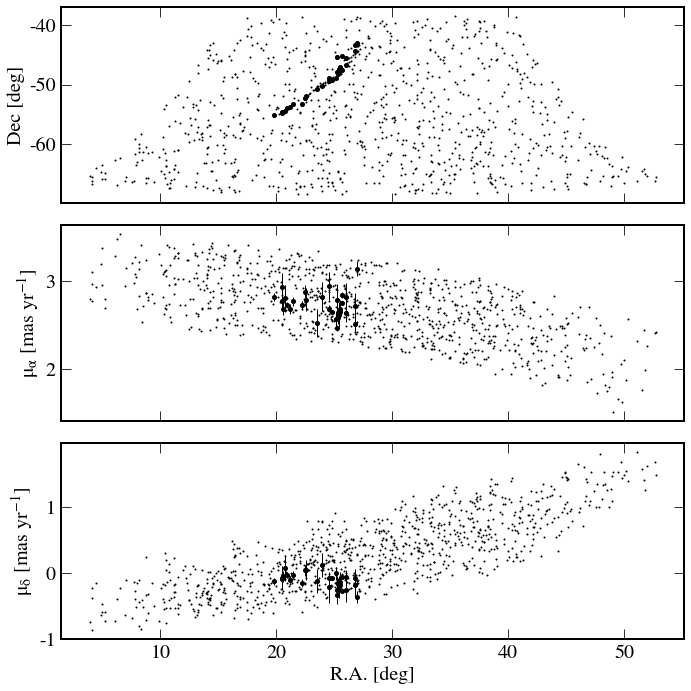

In [461]:
y = [t['dec'], t['pmra'], t['pmdec']]
yerr = [(t['dec_error']*u.mas).to(u.deg).value, t['pmra_error'], t['pmdec_error']]
nr = len(y)
ylabels = ['Dec [deg]', '$\mu_{\\alpha}$ [mas yr$^{-1}$]', '$\mu_{\delta}$ [mas yr$^{-1}$]']

ind_save_phoenix = (ind_pm_phoenix & (ind_cmd | ind_bhb) & (np.abs(cphoenix.phi2.value)<1) & (t['pmra_error']<0.2)
                    & (cphoenix.phi1>-5*u.deg) & (cphoenix.phi1<10*u.deg) & (ceq_nc.ra<27*u.deg))

fig, ax = plt.subplots(nr, 1, figsize=(10,10), sharex=True)

for i in range(nr):
    plt.sca(ax[i])
    
    plt.plot(t['ra'][ind_phoenix], y[i][ind_phoenix], 'ko', ms=1)
    plt.errorbar(t['ra'][ind_save_phoenix], y[i][ind_save_phoenix], yerr=yerr[i][ind_save_phoenix], 
                 fmt='o', color='k', ms=4, lw=1)

    plt.ylabel(ylabels[i])

plt.xlabel('R.A. [deg]')

plt.tight_layout()

In [462]:
width = np.std(cphoenix.phi2[ind_save_phoenix])

In [463]:
data = dict()
data['dec'] = [ceq_nc.ra[ind_save_phoenix], ceq_nc.dec[ind_save_phoenix], np.ones(np.sum(ind_save_phoenix))*width, 
               ceq_nc.dec[ind_save_phoenix]]
data['dist'] = [ceq_nc.ra[ind_save_phoenix], np.ones(np.sum(ind_save_phoenix))*distance_app, 
                np.ones(np.sum(ind_save_phoenix))*delta_distance*2, ceq_nc.dec[ind_save_phoenix]]
data['pmra'] = [ceq_nc.ra[ind_save_phoenix], ceq_nc.pm_ra_cosdec[ind_save_phoenix], 
                t['pmra_error'][ind_save_phoenix]*u.mas/u.yr, ceq_nc.dec[ind_save_phoenix]]
data['pmdec'] = [ceq_nc.ra[ind_save_phoenix], ceq_nc.pm_dec[ind_save_phoenix], 
                t['pmdec_error'][ind_save_phoenix]*u.mas/u.yr, ceq_nc.dec[ind_save_phoenix]]

In [464]:
pickle.dump(data, open('../data/streams/data_phoenix.pkl', 'wb'))
pickle.dump(data, open('../../disrupted_gc/data/streams/data_phoenix.pkl', 'wb'))